In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("mutationc.csv")

Text(50.72222222222221, 0.5, 'ACTUAL')

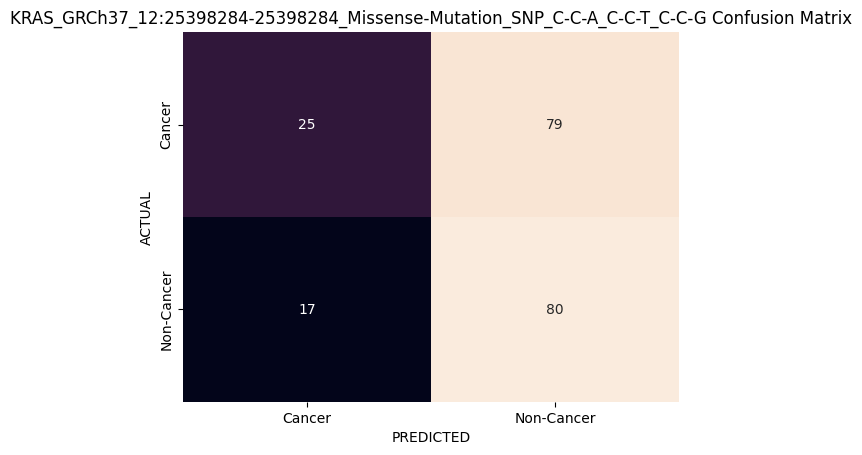

In [3]:
ranked_mutations = data.iloc[:,1:].sum().sort_values(ascending=False).keys()
actual = data.iloc[:,0].str.replace(r'^C\d+$','1',regex=True).replace(r'^NC\d+$','0',regex=True).astype(int)
predicted_0 = data[ranked_mutations[0]]

TP_0 = ((actual == 1) & (predicted_0 == 1))
FP_0 = ((actual == 0) & (predicted_0 == 1))
FN_0 = ((actual == 1) & (predicted_0 == 0))
TN_0 = ((actual == 0) & (predicted_0 == 0))

confusion_matrix = pd.DataFrame(columns=["PP","PN"])
confusion_matrix["PP"] = TP_0.sum(), FP_0.sum()
confusion_matrix["PN"] = FN_0.sum(), TN_0.sum()
confusion_matrix

plt.title(f"{data[ranked_mutations[0]].name} Confusion Matrix")
sns.heatmap(confusion_matrix, annot=True, cbar=False, xticklabels=['Cancer','Non-Cancer'] ,yticklabels=['Cancer','Non-Cancer'], fmt='g')
plt.xlabel("PREDICTED")
plt.ylabel("ACTUAL")

Text(50.72222222222221, 0.5, 'ACTUAL')

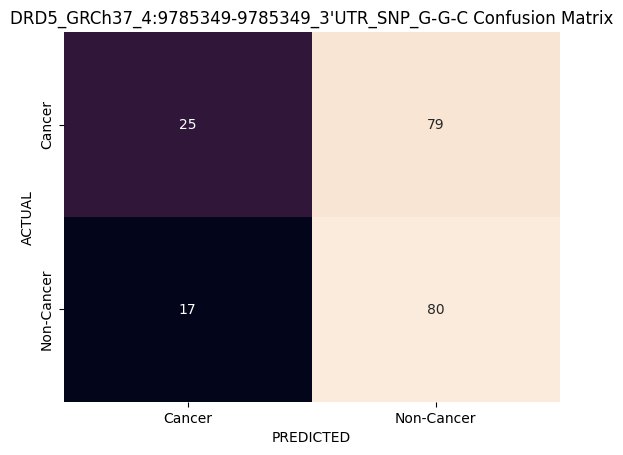

In [4]:
predicted_1 = data[ranked_mutations[1]]

TP_1 = ((actual == 1) & (predicted_0 == 1))
FP_1 = ((actual == 0) & (predicted_0 == 1))
FN_1 = ((actual == 1) & (predicted_0 == 0))
TN_1 = ((actual == 0) & (predicted_0 == 0))

confusion_matrix = pd.DataFrame(columns=["PP","PN"])
confusion_matrix["PP"] = TP_1.sum(), FP_1.sum()
confusion_matrix["PN"] = FN_1.sum(), TN_1.sum()
confusion_matrix

plt.title(f"{data[ranked_mutations[1]].name} Confusion Matrix")
sns.heatmap(confusion_matrix, annot=True, cbar=False, xticklabels=['Cancer','Non-Cancer'] ,yticklabels=['Cancer','Non-Cancer'], fmt='g')
plt.xlabel("PREDICTED")
plt.ylabel("ACTUAL")

<Axes: title={'center': 'KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G'}, ylabel='# of Outcomes'>

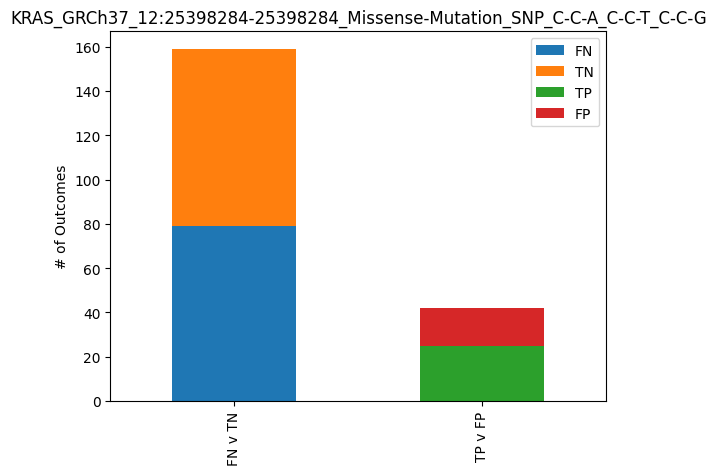

In [5]:
TP0_v_FP0 = pd.DataFrame({"TP":TP_0.sum(),"FP":FP_0.sum()},index=['TP v FP'])
FN0_v_TN0 = pd.DataFrame({"FN":FN_0.sum(),"TN":TN_0.sum()},index=['FN v TN'])

cbdf_0 = pd.concat([FN0_v_TN0, TP0_v_FP0], axis=0)
cbdf_0.plot(kind="bar", stacked=True, ylabel="# of Outcomes", title=f"{data[ranked_mutations[0]].name}")

<Axes: title={'center': "DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C"}, ylabel='# of Outcomes'>

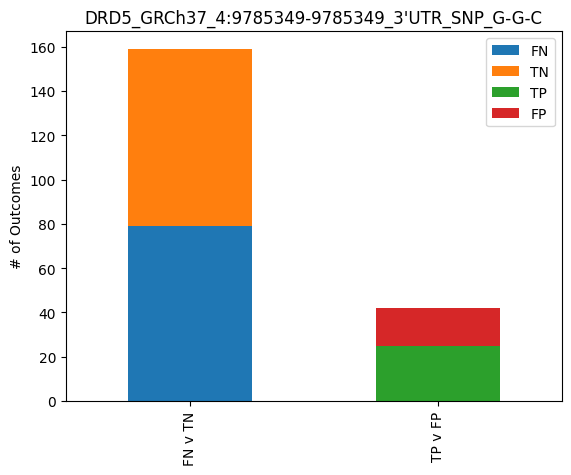

In [6]:
TP1_v_FP1 = pd.DataFrame({"TP":TP_1.sum(),"FP":FP_1.sum()},index=['TP v FP'])
FN1_v_TN1 = pd.DataFrame({"FN":FN_1.sum(),"TN":TN_1.sum()},index=['FN v TN'])
cbdf_1 = pd.concat([FN1_v_TN1, TP1_v_FP1], axis=0)
cbdf_1.plot(kind="bar", stacked=True, ylabel="# of Outcomes", title=f"{data[ranked_mutations[1]].name}")

<Axes: title={'center': 'KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G Confusion Matrix'}>

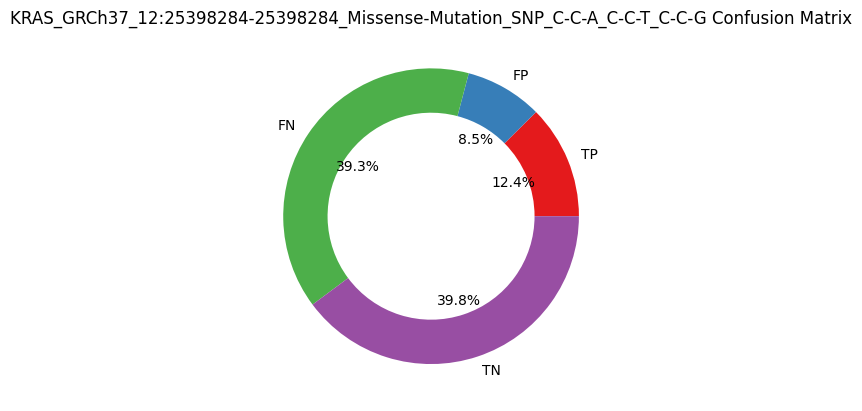

In [7]:
pie_0 = pd.Series({"TP":TP_0.sum(),"FP":FP_0.sum(),"FN":FN_0.sum(),"TN":TN_0.sum()})
plt.title(f"{data[ranked_mutations[0]].name} Confusion Matrix")
pie_0.plot(kind="pie",autopct='%1.1f%%',colors=sns.color_palette('Set1'),wedgeprops=dict(width=0.3))

<Axes: title={'center': "DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C Confusion Matrix"}>

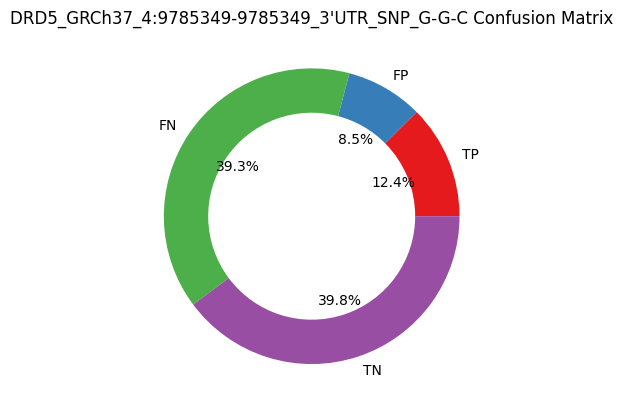

In [8]:
pie_1 = pd.Series({"TP":TP_1.sum(),"FP":FP_1.sum(),"FN":FN_1.sum(),"TN":TN_1.sum()})
plt.title(f"{data[ranked_mutations[1]].name} Confusion Matrix")
pie_1.plot(kind="pie",autopct='%1.1f%%',colors=sns.color_palette('Set1'),wedgeprops=dict(width=0.3))

In [11]:
# TO BE USED FOR QUESTIONS
ranked_mutations = data.iloc[:,1:].sum().sort_values(ascending=False).keys()
t_actual = data.iloc[:,0].str.replace(r'^C\d+$','1',regex=True).replace(r'^NC\d+$','0',regex=True).astype(int)
actual = pd.DataFrame(
    np.tile(t_actual.values.reshape(-1,1), len(ranked_mutations)),
    columns=ranked_mutations,
    index=t_actual.index
)
predicted = data[ranked_mutations]
TP = ((actual == 1) & (predicted_0 == 1))
FP = ((actual == 0) & (predicted_0 == 1))
FN = ((actual == 1) & (predicted_0 == 0))
TN = ((actual == 0) & (predicted_0 == 0))

C = (t_actual == 1).sum()
NC = (t_actual == 0).sum()
total_samples = C + NC
percent_TP = TP / total_samples * 100
percent_FP = FP / total_samples * 100

values = pd.DataFrame({
    'TP': TP,
    'FP': FP,
    'FN': FN,
    'TN': TN,
    # 'TP-FP':TP ^ FP,
    '%TP': percent_TP,
    '%FP': percent_FP,
    # "perTP-perFP":percent_TP - percent_FP
})

ValueError: If using all scalar values, you must pass an index

## Which of the two mutations listed above is more useful for the classification of the C and NC samples? 
    
By looking at the ratios in the pie graph generated from step 3, we can see DRD5_GRCh37_4 has a higher true positive and true negative rate than the KRAS gene. In the previous activity the dispersion between NC vs C samples between DRD5 and KRAS, DRD5 contains more C samples than NC samples.

In [152]:
## If we use the quantity “TP – FP” to classify samples, which feature would be the most useful for classifying samples? 
    # (I.e., of all possible mutations, which genetic mutation yields the maximal value for the quantity “TP – FP”?) 
print(f"MUTATION --------\n{values.sort_values(by="TP-FP",ascending=False).iloc[0,:].name}")
## What is the maximum value of “TP – FP” across all features?
print(f"MAX TP-FP --------\n{values.sort_values(by="TP-FP",ascending=False).iloc[0,4]}")

MUTATION --------
BRAF_GRCh37_7:140453136-140453136_Missense-Mutation_SNP_A-A-T
MAX TP-FP --------
115


In [153]:
## If we use the quantity “%TP - %FP” to classify samples, which feature would be the most useful for classifying samples? 
    # (I.e., of all possible mutations, which genetic mutation yields the maximal value for the quantity “%TP - %FP”?) 
## What is the maximum value of “%TP –%FP” across all features?
print(f"MUTATION --------\n{values.sort_values(by="perTP-perFP",ascending=False).iloc[0,:].name}")
print(f"MAX %TP-%FP --------\n{values.sort_values(by="perTP-perFP",ascending=False).iloc[0,7]}")

MUTATION --------
BRAF_GRCh37_7:140453136-140453136_Missense-Mutation_SNP_A-A-T
MAX %TP-%FP --------
57.2139303482587
